
# Laboratorio 2(Regresion Polinomica) Grupo 2
 <h3>Implementacion de Regresion lineal para entrenar el modelo, y realizar las respectivas predicciones.<h3>
 <HR>
 <h3>
  NOMBRE: <Name>MAMANI RAMOS LIZANDRO<br>
  CARRERA: <Carrera> INGENIERIA DE SISTEMAS <BR>
  FECHA: <Current> 26/08/2024<BR>

  * [Enlace al git hub]( https://github.com/L1ZANDR0/IA1-2-2024/tree/main/LABORATORIOS/Laboratorio2)

  
 <h3>

Para el laboratorio hizo uso del dataset para La cantidad de bicicletas que pasan al alquiler por hora entre los años 2011 y 2012.el enlace al dataset es [Bike Sharing Dataset](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset).

El archivo `hour.csv` contiene un conjunto de entrenamiento con las siguientes caracteristicas:


**Especificación de cada variable de entrada.-**

- instant.- El instante en que pase.
- dteday.- fecha del registro
- season.- la temporada del registro
- yr.- el año
- mnth.- el mes del registro
- h.- hora del registro
- holiday.- Si es vacaciones o no
- weekday.- dia de la semana
- workingda.- si es dia de trabajo
- weathersit.- situacion meteorologica
- temp.- temperatura
- atemp.- Temperatura normalizada en grados Celsius. Los valores se dividen en 50 (máximo).
- hum.- Humedad normalizada. Los valores se dividen entre 100 (max)
- windspeed.- Velocidad del viento normalizada. Los valores se dividen en 67 (máx.)
- casual.- recuento de usuarios ocasionales
- registered.- recuento de usuarios registrados

**Especificación de la variable de salida.-**
- cnt.- recuento total de bicicletas de alquiler, incluidas las ocasionales y registradas




## 1. Regresion polinomica

In [1]:
# utilizando la libreria os para manejos de directorios
import os

# Computacion vectorial y cientifica para python
import numpy as np

#importamos pandas para el manejo del dataset, y separarlos dentro de una matriz
import pandas as pd

#esta tabulate nos sirve para hacer tablas
from tabulate import tabulate

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # -> Necesario para graficar superficies 3D

#Para separa el 20% y 80%
from sklearn.model_selection import train_test_split

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline


Importamos **PolynomialFeatures** es una clase en scikit-learn que se utiliza para generar características polinómicas a partir de un conjunto de características existente. En el contexto de regresión polinómica, puedes usar PolynomialFeatures para generar nuevas características que son combinaciones polinómicas de las características originales.

In [10]:
from sklearn.preprocessing import PolynomialFeatures

### 1.1 Cargamos los datos del dataset


In [23]:
data = pd.read_csv('hour.csv', delimiter=',')
poly = PolynomialFeatures(degree=2)

#retiramos el instant y la dteday del las columnas, quitamos el precio ya que ira a el vector Y, tambien quitamos los titulos
dataset = data.drop(['instant', 'dteday'], axis=1).astype(float)

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

x_test = test_dataset.drop(['cnt'], axis=1).values
y_test = test_dataset['cnt'].values

# Seleccionamos las columnas para X y la columna 'cnt' para y
X_train = poly.fit_transform(train_dataset.drop(['cnt'], axis=1).values)
y_train = train_dataset['cnt'].values
m_train = len(y_train)

# Ahora, X y y deberían contener datos numéricos del 80% del dataset

print(f'La cantidad de caracteristicas es: {X_train.shape[1]}')
print(f'la cantidad de ejemplos es: {y_train.shape[0]}')
print(f'La cantidad de ejemplos del 80% es: {len(train_dataset)}')
print(f'La cantidad de ejemplos del 20% es: {len(test_dataset)}')

X_train

La cantidad de caracteristicas es: 120
la cantidad de ejemplos es: 13903
La cantidad de ejemplos del 80% es: 13903
La cantidad de ejemplos del 20% es: 3476


array([[1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 3.24000e+02,
        9.72000e+02, 2.91600e+03],
       [1.00000e+00, 4.00000e+00, 0.00000e+00, ..., 4.22500e+03,
        2.94450e+04, 2.05209e+05],
       [1.00000e+00, 4.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 9.00000e+00],
       ...,
       [1.00000e+00, 3.00000e+00, 0.00000e+00, ..., 6.76000e+02,
        4.23800e+03, 2.65690e+04],
       [1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 9.00000e+00,
        2.91000e+02, 9.40900e+03],
       [1.00000e+00, 4.00000e+00, 1.00000e+00, ..., 1.08900e+03,
        2.46180e+04, 5.56516e+05]])

Haciendo un analisis de los tipos de datos para cada columna:

In [25]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  float64
 1   yr          17379 non-null  float64
 2   mnth        17379 non-null  float64
 3   hr          17379 non-null  float64
 4   holiday     17379 non-null  float64
 5   weekday     17379 non-null  float64
 6   workingday  17379 non-null  float64
 7   weathersit  17379 non-null  float64
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  float64
 13  registered  17379 non-null  float64
 14  cnt         17379 non-null  float64
dtypes: float64(15)
memory usage: 2.0 MB


### 1.2 Normalización de caracteristicas

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. 

En este caso hacemos el uso de la siguiente funcion para normalizar los datos

In [26]:
def  featureNormalize(X):
    X_norm = X.copy()

    #creamos un array de ceros con una longitud igual al número de columnas en el array X. La variable mu y sigma se inicializa como este array de ceros.
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    #Creamos el promedio de cada columna de X
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    
    sigma[sigma == 0] = 1
    
    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma


In [29]:
# llama featureNormalize con los datos cargados

X_norm, mu, sigma = featureNormalize(X_train)

print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_norm[:,0]', '  X_norm[:, 1]', '  X_norm[:, 2]', '  X_norm[:, 3]', '  X_norm[:, 4]', '  X_norm[:, 5]', '  X_norm[:, 6]', '  X_norm[:, 7]', '  X_norm[:, 8]', '  X_norm[:, 9]', '  X_norm[:, 10]', '  X_norm[:, 11]',
    '  X_norm[:, 12]', '  X_norm[:, 13]', '.....'
))
print('-' * 172)

for i in range(10):
    print('{:8.4f}{:17.4f}{:13.4f}{:14.4f}{:15.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}'.format(
        X_norm[i, 0], 
        X_norm[i, 1], 
        X_norm[i, 2], 
        X_norm[i, 3], 
        X_norm[i, 4], 
        X_norm[i, 5], 
        X_norm[i, 6], 
        X_norm[i, 7], 
        X_norm[i, 8], 
        X_norm[i, 9], 
        X_norm[i, 10], 
        X_norm[i, 11],
        X_norm[i, 12], 
        X_norm[i, 13],
    ))

print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)


X_norm[:,0]  X_norm[:, 1]  X_norm[:, 2]  X_norm[:, 3]  X_norm[:, 4]  X_norm[:, 5]  X_norm[:, 6]  X_norm[:, 7]  X_norm[:, 8]  X_norm[:, 9]  X_norm[:, 10]  X_norm[:, 11]  X_norm[:, 12]  X_norm[:, 13]     .....
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  0.0000          -1.3636      -1.0041       -1.6157        -0.0806       -0.1719        1.4925       -1.4563       -0.6669       -1.5408        -1.6203        -0.3994         0.2787        -0.3627
  0.0000           1.3469      -1.0041        1.0030         0.9322       -0.1719       -0.4963        0.6867       -0.6669        0.1171         0.1382        -1.0737        -0.6977         0.5842
  0.0000           1.3469      -1.0041        1.5849        -1.2381       -0.1719        0.0009        0.6867        2.4639       -0.1938        -0.1258         1.9346         0.2787        -0.7254
  0.0000          -0.4601

### 1.3 Descenso por el gradiente

Una vez ya tenido los datos listos y normalizados, se procede al calculo del costo.

#### 1.3.1 Cálculo del costo $J(\theta)$

In [30]:
#Creamos la funcion de calcular costo
def calcularCosto(X, y, theta):
  m = y.size
  J = 0
  #h = np.dot(X, theta)
  # print(h)
  J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
  return J

In [31]:
# No olvidarse agregar unos a la matriz de x

X_ready = np.concatenate([np.ones((m_train, 1)), X_norm], axis=1)

print('{:>8s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}'.format(
    'X_norm[:,0]', '  X_norm[:, 1]', '  X_norm[:, 2]', '  X_norm[:, 3]', '  X_norm[:, 4]', '  X_norm[:, 5]', '  X_norm[:, 6]', '  X_norm[:, 7]', '  X_norm[:, 8]', '  X_norm[:, 9]', '  X_norm[:, 10]', '  X_norm[:, 11]',
    '  X_norm[:, 12]', '  X_norm[:, 13]', '  X_norm[:, 14]'
))
print('-' * 172)

for i in range(10):
    print('{:8.4f}{:17.4f}{:13.4f}{:14.4f}{:15.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:14.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}{:15.4f}'.format(
        X_ready[i, 0], 
        X_ready[i, 1], 
        X_ready[i, 2], 
        X_ready[i, 3], 
        X_ready[i, 4], 
        X_ready[i, 5], 
        X_ready[i, 6], 
        X_ready[i, 7], 
        X_ready[i, 8], 
        X_ready[i, 9], 
        X_ready[i, 10], 
        X_ready[i, 11],
        X_ready[i, 12], 
        X_ready[i, 13],
        X_ready[i, 14],
    ))

print('Media calculada:', mu, len(mu))
print('Desviación estandar calculada:', sigma, len(sigma))

X_norm[:,0]  X_norm[:, 1]  X_norm[:, 2]  X_norm[:, 3]  X_norm[:, 4]  X_norm[:, 5]  X_norm[:, 6]  X_norm[:, 7]  X_norm[:, 8]  X_norm[:, 9]  X_norm[:, 10]  X_norm[:, 11]  X_norm[:, 12]  X_norm[:, 13]  X_norm[:, 14]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------
  1.0000           0.0000      -1.3636       -1.0041        -1.6157       -0.0806       -0.1719        1.4925       -1.4563       -0.6669        -1.5408        -1.6203        -0.3994         0.2787        -0.3627
  1.0000           0.0000       1.3469       -1.0041         1.0030        0.9322       -0.1719       -0.4963        0.6867       -0.6669         0.1171         0.1382        -1.0737        -0.6977         0.5842
  1.0000           0.0000       1.3469       -1.0041         1.5849       -1.2381       -0.1719        0.0009        0.6867        2.4639        -0.1938        -0.1258         1.9346      

Ejemplo de funcionamiento de la funcion **calcularCosto** con dos valores diferentes de $\theta$.

In [32]:
# Generar un vector aleatorio entre 0 y 1 con longitud 190
theta = np.random.rand(len(X_ready[1]))
theta2 = np.random.rand(len(X_ready[1]))
print(theta.shape[0])
# theta1=np.array([0.5, 7.0, 0.2])

print(f"########################################################################################################")
print(f"con theta:{ theta } se obtiene un costo de: {calcularCosto(X_ready, y_train, theta)}")
print(f"########################################################################################################")
print(f"con theta:{ theta2 } se obtiene un costo de: {calcularCosto(X_ready, y_train, theta2)}")

121
########################################################################################################
con theta:[0.6561999  0.14260503 0.0105881  0.50079024 0.93445549 0.81766507
 0.35305706 0.95970083 0.0835541  0.60953771 0.92940982 0.61069361
 0.0307597  0.32844127 0.47273079 0.00992137 0.54619086 0.64641622
 0.81178355 0.87728877 0.96908857 0.97236113 0.07511379 0.91431671
 0.80718706 0.9656254  0.43092254 0.65996756 0.11110417 0.65240577
 0.96692021 0.94072484 0.16370795 0.45814464 0.28150279 0.14894714
 0.42142725 0.37582914 0.30730167 0.56615494 0.74976326 0.4157503
 0.73593571 0.9649749  0.1930133  0.55131219 0.15113331 0.23430874
 0.75042398 0.2091528  0.02831133 0.61609439 0.64398553 0.26833865
 0.85373864 0.59556021 0.65342257 0.4936226  0.88366718 0.74519841
 0.59267116 0.29758027 0.97490777 0.21174258 0.51961219 0.44141106
 0.01790846 0.9880835  0.96979118 0.23715123 0.27905151 0.5150331
 0.78108917 0.22572849 0.4373877  0.88620311 0.75482676 0.43973405
 0.79886482 

#### 1.3.2 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decrecen en cada paso.

In [33]:
#Creamos la funcion para calcular el descenso por Gradiente
def calcularDescensoGradiente(X, y, theta, alpha, numero_iteraciones):
  m = y.shape[0]
  theta = theta.copy()
  J_historico = []

  for i in range(numero_iteraciones):
    theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
    J_historico.append(calcularCosto(X, y, theta))

  return theta, J_historico

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.009.

In [38]:
#creamos un theta con 190 columnas de ceros
theta = np.zeros(len(X_ready[1]))

#numero de iteraciones sera 1000000 y un alpha 0.00009
num_ite = 600
alpha = 0.009

theta, J_historico = calcularDescensoGradiente(X_ready, y_train, theta, alpha, num_ite)
print("########################################################################################################")
print("Los valores de theta calculados son:")
i = 0
for tht in theta:
    i += 1
    print(f"theta {i}: {tht}")


print(f"########################################################################################################")
#mostramos el ultimo costo, este seria el mejor costo
print(f"con un costo de: { J_historico[-1]} ")

# print("Grafica la convergencia del costo")
# Grafica de la convergencia del costo

########################################################################################################
Los valores de theta calculados son:
theta 1: 189.73710054650599
theta 2: 0.0
theta 3: 1.377177172495157
theta 4: 2.966609334503111
theta 5: 1.066315301205466
theta 6: 4.518480756868065
theta 7: -0.4927722938995303
theta 8: -0.021635529200163373
theta 9: -0.11466587872668751
theta 10: -1.3891301382254861
theta 11: 3.9587617171670626
theta 12: 3.874436538586864
theta 13: -4.720733879498762
theta 14: -0.3168903344455304
theta 15: 12.884480216130418
theta 16: 27.160079385667434
theta 17: 0.6785712219493011
theta 18: -2.2952589904386675
theta 19: 0.9596818341806169
theta 20: -0.7218682883291523
theta 21: 0.16720218376009668
theta 22: -0.7908239785290108
theta 23: -0.8541009064166569
theta 24: -0.03036928120882627
theta 25: -1.5162985680447247
theta 26: -1.5673438633160217
theta 27: -0.7813103479033785
theta 28: -0.9115187323717914
theta 29: 3.476370139333374
theta 30: 10.062793705075071

Se utilizan los parametros finales para grafica la linea.

### 1.4 Grafica de la convergencia del costo
graficamos el costo

[29152.747598481223, 25509.087127936913, 23070.914616176466, 21377.85722871072, 20149.88013492291, 19216.03345948205, 18471.460042126306, 17851.433704054456, 17315.664870904067, 16838.799669419826, 16404.657788435197, 16002.729441554004, 15626.039057167089, 15269.837154530589, 14930.795121189187, 14606.506197605628, 14295.173559938, 13995.413239413967, 13706.127932837195, 13426.424896212193, 13155.56150285115, 12892.908359411462, 12637.923718898483, 12390.135280892706, 12149.12691332309, 11914.52872208127, 11686.009449665129, 11463.270532287857, 11246.041365796618, 11034.07547267761, 10827.147354984656, 10625.049879422766, 10427.592082308682, 10234.59731073543, 10045.90163639998, 9861.352493015345, 9680.807498826158, 9504.133433657029, 9331.20534592827, 9161.90576970147, 8996.12403543172, 8833.755660958512, 8674.701811546116, 8518.86881961867, 8366.167756323945, 8216.514048275862, 8069.827133826003, 7926.030154041349, 7785.049674253194, 7646.815432616926, 7511.260112604924, 7378.319136

Text(0, 0.5, 'Costo J')

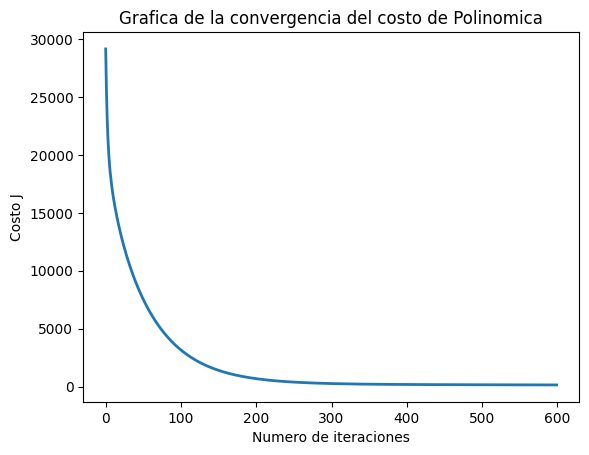

In [39]:
pyplot.plot(np.arange(len(J_historico)), J_historico, lw=2)
print(J_historico)
pyplot.title("Grafica de la convergencia del costo de Polinomica")
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

### 1.5 Grafica de la regresion Polinomica

In [40]:
# Creamos una funcion que nos ayude con las graficas de cada dato respecto a la Y predicha
def graficarDatos(x, y, xlabel, ylabel):
  fig = pyplot.figure()
  pyplot.plot(x, y, 'ro', ms=10, mec='k')

  pyplot.xlabel(xlabel)
  pyplot.ylabel(ylabel)

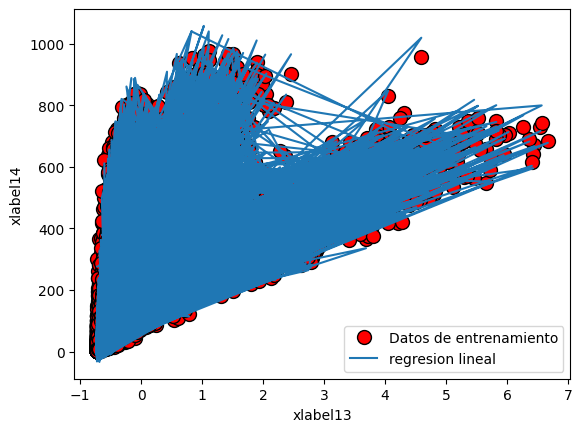

In [75]:
graficarDatos(X_ready[:, 14], y_train , 'xlabel13', 'xlabel14')

pyplot.plot(X_ready[:,14], np.dot(X_ready, theta), '-')

pyplot.legend(['Datos de entrenamiento', 'regresion lineal'])

### 1.6 Ejemplos de Predicciones
Se creo una matriz con 5 ejemplos, donde se hace las predicciones correpondientes:

In [83]:
#Creamos la matriz con 11 ejemplos para hacer la prueba predecir una hora de cada ejemplo:
matriz_datos = np.array([
[4,1,12,12,0,1,1,3,0.44,0.4394,1,0.2239,23,150],
[4,1,12,13,0,1,1,3,0.44,0.4394,1,0.2239,30,190],
[4,1,12,14,0,1,1,2,0.5,0.4848,0.94,0.2239,31,179],
[4,1,12,15,0,1,1,2,0.5,0.4848,0.87,0.1642,29,207],
[4,1,12,16,0,1,1,2,0.5,0.4848,0.88,0.1045,37,308],
])

# Creamos un vector para almacenar cada Y predicha
y_pre = []

# Copiamos la matriz de datos para preservar la original
matriz_datos_copy = matriz_datos.copy()

# Aplicamos la transformación polinómica, no agregamos unos, porque por defecto PolynomialFeatures lo llena de 1
poly_test = PolynomialFeatures(degree=2)
matriz_datos_poli = poly_test.fit_transform(matriz_datos)

matriz_datos_poli = np.concatenate([np.ones((matriz_datos_poli.shape[0], 1)), matriz_datos_poli], axis=1)

print(len(mu))
print(len(sigma))

# Normalizamos todos, menos el primer valor de cada ejemplo
for datos in matriz_datos_poli:
    datos[1:] = (datos[1:] - mu) / sigma

# Calculamos la Y predicha de los 11 ejemplos de predicción
for datos in matriz_datos_poli:
    y_pre.append(np.dot(datos, theta))


# Añadimos la columna de Y predicha a la matriz original
matriz_datos_copy = np.column_stack((matriz_datos_copy, y_pre))

# Nombres de columnas
nombres_columnas = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit','temp','atemp','hum','windspeed','casual','registered','cnt']

# Convertir la matriz en una lista de listas
datos_para_tabla = matriz_datos_copy.tolist()

# Imprimir la tabla
print(tabulate(datos_para_tabla, headers=nombres_columnas, tablefmt='grid'))


120
120
+----------+------+--------+------+-----------+-----------+--------------+--------------+--------+---------+-------+-------------+----------+--------------+---------+
|   season |   yr |   mnth |   hr |   holiday |   weekday |   workingday |   weathersit |   temp |   atemp |   hum |   windspeed |   casual |   registered |     cnt |
+==========+======+========+======+===========+===========+==============+==============+========+=========+=======+=============+==========+==============+=========+
|        4 |    1 |     12 |   12 |         0 |         1 |            1 |            3 |   0.44 |  0.4394 |  1    |      0.2239 |       23 |          150 | 167.957 |
+----------+------+--------+------+-----------+-----------+--------------+--------------+--------+---------+-------+-------------+----------+--------------+---------+
|        4 |    1 |     12 |   13 |         0 |         1 |            1 |            3 |   0.44 |  0.4394 |  1    |      0.2239 |       30 |          190 | 

### 1.7 Validaciones
Para hacer las validaciones correspondientes, se hizo el uso **Mean squeared error**

Siguiendo el consejo de 80/20, donde 80% es para la fase de entrenamiento, y 20% es para la fase de prueba.

In [84]:
#Creamos la funcion:
def mean_squared_error(y_pred, y_actual):
    resta = y_pred - y_actual
    err_cuadrado = np.sum(resta ** 2)
    return err_cuadrado / len(y_pre)


#### 1.7.1 haciendo calculo del error cuadratico medio

In [96]:
#haciendo x_test que es el 20% restante
m = len(y_test)

# Aplicamos la transformación polinómica, no agregamos unos, porque por defecto PolynomialFeatures lo llena de 1
poly_test = PolynomialFeatures(degree=2)
datos_poli_test = poly_test.fit_transform(x_test)

#añadimos los unos
datos_test = np.concatenate([np.ones((datos_poli_test.shape[0], 1)), datos_poli_test], axis=1)

# Normalizamos todos, menos el primer valor de cada ejemplo porque este contiene los unos
for datos in datos_test:
    datos[1:] = (datos[1:] - mu) / sigma

#creamos un array que almacenara cada una de las y_predicha
y_predicha = []

for data_test_ready in datos_test:
    y_predicha.append(np.dot(data_test_ready, theta))

mse = mean_squared_error(y_predicha, y_test)
#calculamos el error cuadratico medio:
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 189042.4811937156
Raíz del Error Cuadrático Medio (RMSE) = 434.7901576550642
